# Classification I: Logistic Regression

**OBJECTIVES**:

- Differentiate between *Regression* and *Classification* problem settings
- Connect Least Squares methods to Classification through Logistic Regression
- Interpret coefficients of the model in terms of probabilities
- Discuss performance of classification model in terms of accuracy
- Understand the effect of an imbalanced target class on model performance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

ModuleNotFoundError: No module named 'seaborn'

### Our Motivating Example



In [31]:
default = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/Default.csv', index_col = 0)

In [32]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [33]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


### Visualizing Default by Continuous Features

In [34]:
#scatterplot of balance vs. income colored by default status

<AxesSubplot: xlabel='balance', ylabel='income'>

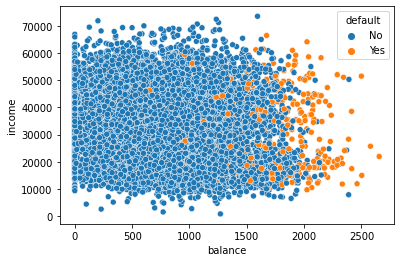

In [35]:
sns.scatterplot(data = default, x = 'balance', y = 'income', hue = 'default')

<AxesSubplot: xlabel='default', ylabel='income'>

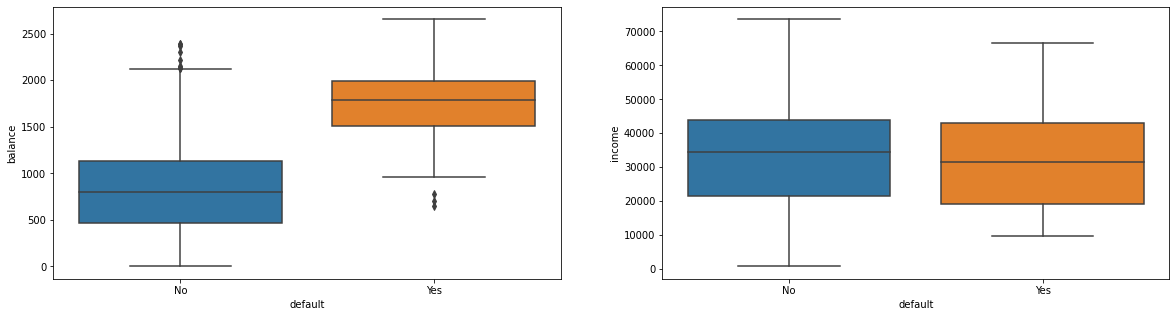

In [36]:
#boxplots for balance and income by default
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.boxplot(data = default, x = 'default', y = 'balance', ax = ax[0])
sns.boxplot(data = default, x = 'default', y = 'income', ax = ax[1])

### Considering only `balance` as the predictor



In [37]:
#create binary default column
default['binary_default'] = np.where(default['default'] == 'No', 0, 1)

<AxesSubplot: xlabel='balance', ylabel='binary_default'>

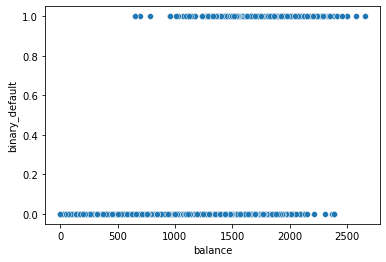

In [38]:
#scatter of Balance vs Default
sns.scatterplot(data = default, x = 'balance', y = 'binary_default')

##### PROBLEM

1. Build a `LinearRegression` model with balance as the predictor.
2. Interpret the $r^2$ score and $rmse$ (`root_mean_squared_error`) for your regressor.
3. Predict the default for balances: `[200, 1000, 1500, 2000, 2500, 3500]`.  Do these make sense?

In [40]:
X = default[['balance']]
y = default['binary_default']

In [41]:
lr = LinearRegression().fit(X, y)
lr.score(X, y)

0.12258348714904299

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
np.sqrt(mean_squared_error(y, lr.predict(X)))

0.16806252253551823

In [46]:
new_X = np.array([200, 1000, 1500, 2000, 2500, 3500])

In [47]:
predictions = lr.predict(new_X.reshape(-1, 1))
predictions

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.04921752,  0.05468022,  0.11961631,  0.1845524 ,  0.2494885 ,
        0.37936068])

<AxesSubplot: xlabel='balance', ylabel='binary_default'>

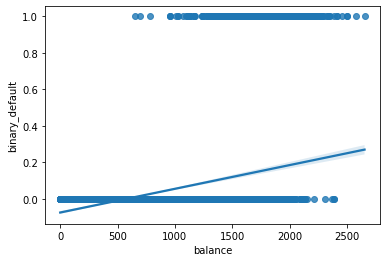

In [48]:
#regplot
sns.regplot(x = X, y = y)

### The Sigmoid aka Logistic Function


$$y = \frac{1}{1 + e^{-x}}$$

In [49]:
#define the logistic
def logistic(x): return 1/(1 + np.exp(-x))

In [50]:
#domain
x = np.arange(-10, 10, .1)

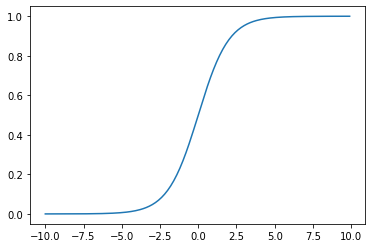

In [51]:
#plot it
plt.plot(x, logistic(x))

### Usage should seem familiar

Fit a `LogisticRegression` estimator from `sklearn` on the features:

```python 
X = default[['balance']]
y = default['binary_default']
```

In [53]:
#instantiate
clf = LogisticRegression()

In [54]:
#define X and y
X = default[['balance']]
y = default['default']

In [55]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [56]:
#fit on the train
clf.fit(X_train, y_train)

LogisticRegression()

In [57]:
#examine train and test scores
print(f'Train Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Train Score: 0.9728
Test Score: 0.9712


### Evaluating the Classifier

In `scikitlearn` the primary default evalution metric is **accuracy** or percent correct.  We still need to compare this to our baseline -- typically predicting the most frequently occurring class.  Further, you can investigate the mistakes made with each class by looking at the **Confusion Matrix**.  A quick visualization of this is had using the `ConfusionMatrixDisplay`.

In [58]:
#baseline -- most frequently occurring class
y_train.value_counts(normalize = True)

No     0.966533
Yes    0.033467
Name: default, dtype: float64

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

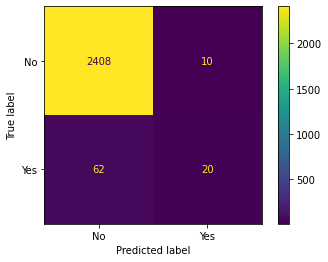

In [60]:
#from estimator
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### Similarities to our earlier work

In [61]:
#there is a coefficient
clf.coef_

array([[0.00556055]])

In [62]:
#there is an intercept
clf.intercept_

array([-10.76105259])

### Where was the line?

The version of the logistic we have just developed is actually:

$$ y = \frac{e^{ax + b}}{1 + e^{ax + b}} $$

Its output represents probabilities of being labeled the positive class in our example.  This means that we can interpret the output of the above function using our parameters, remembering that we used the `balance` feature to predict `default`.

In [63]:
def predictor(x):
    line = clf.coef_[0]*x + clf.intercept_
    return np.e**line/(1 + np.e**line)

In [64]:
#predict 1000
predictor(1000)

array([0.00548355])

In [65]:
#predict 2000
predictor(2000)

array([0.58905082])

In [66]:
#estimator has this too
clf.predict_proba(np.array([[1000]]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99451645, 0.00548355]])

In [67]:
clf.predict(np.array([[1000]]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

### Using Categorical Features

In [68]:
default.head(2)

,default,student,balance,income,binary_default
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0


In [69]:
default['student_binary'] = np.where(default.student == 'No', 0, 1)

In [70]:
X = default[['student_binary']]

In [71]:
#instantiate and fit
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [72]:
#performance
clf.score(X, y)

0.9667

In [73]:
#coefficients
clf.coef_

array([[0.39960123]])

In [74]:
#compare probabilities
clf.predict_proba(X)

array([[0.97074839, 0.02925161],
       [0.95699704, 0.04300296],
       [0.97074839, 0.02925161],
       ...,
       [0.97074839, 0.02925161],
       [0.97074839, 0.02925161],
       [0.95699704, 0.04300296]])

### Using Multiple Features



In [75]:
default.columns

Index(['default', 'student', 'balance', 'income', 'binary_default',
       'student_binary'],
      dtype='object')

In [76]:
features = ['balance', 'income', 'student_binary']
X = default.loc[:, features]
y = default['binary_default']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [78]:
clf = LogisticRegression().fit(X_train, y_train)

In [79]:
clf.score(X_train, y_train)

0.9674666666666667

In [80]:
clf.score(X_test, y_test)

0.966

**Predictions**:

- student: yes
- balance: 1,500 dollars
- income: 40,000 dollars

In [81]:
ex1 = np.array([[1500, 40_000, 1]])
#predict probability
clf.predict_proba(ex1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99774529, 0.00225471]])

- student: no
- balance: 1,500 dollars
- income: 40,000 dollars

In [82]:
ex2 = np.array([[1500, 40_000, 0]])
#predict probability
clf.predict_proba(ex2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.90067473, 0.09932527]])

### This is similar to our multicollinearity in regression; we will call it confounding

<center>
<img src = 'https://github.com/jfkoehler/nyu_bootcamp_fa24/blob/main/images/default_confound.png?raw=true' />
</center>

#### Using `scikitlearn` and its `Pipeline`

From the original data, to build a model involved:

1. One hot or dummy encoding the categorical feature.
2. Standard Scaling the continuous features
3. Building Logistic model

we can accomplish this all with the `Pipeline`, where the first step is a `make_column_transformer` and the second is a `LogisticRegression`.  

In [83]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [84]:
X_train, X_test, y_train, y_test = train_test_split(default[['student', 'income', 'balance']], default['default'],
                                                   random_state = 22)

In [85]:
# create OneHotEncoder instance
ohe = OneHotEncoder(drop = 'first')

In [86]:
# create StandardScaler instance
sscaler = StandardScaler()

In [87]:
# make column transformer
transformer = make_column_transformer((ohe, ['student']), 
                                     remainder = sscaler)

In [88]:
# logistic regressor
clf = LogisticRegression()

In [89]:
# pipeline
pipe = Pipeline([('transform', transformer), 
                 ('model', clf)])

In [90]:
# fit it
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['student'])])),
                ('model', LogisticRegression())])

In [91]:
# score on train and test
print(f'Train Score: {pipe.score(X_train, y_train)}')
print(f'Test Score: {pipe.score(X_test, y_test)}')

Train Score: 0.9741333333333333
Test Score: 0.9712


In [92]:
pipe.named_steps['model'].coef_

array([[-0.66544316,  0.00678331,  2.75262099]])

#### Problem

Below, a dataset on bank customer churn is loaded and displayed.  Your objective is to predict `Exited` or not.  Use `CreditScore`, `Gender`, `Age`, `Tenure`, and `Balance` as predictors.  Examine the confusion matrix display.  Was your classifier better at predicting exits or non-exits?

In [93]:
from sklearn.datasets import fetch_openml

In [94]:
bank_churn = fetch_openml(data_id = 43390).frame

In [95]:
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [96]:
#create train/test split -- random_state = 42
X = bank_churn[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance']]
y = bank_churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [97]:
ohe = OneHotEncoder(drop = 'first')
sscaler = StandardScaler()

In [98]:
#encode gender and standard scale other features
transformer = make_column_transformer((ohe, ['Gender']),
                                     remainder = sscaler)

In [99]:
#set up pipeline to encode/scale and then build logistic regression model
pipe = Pipeline([('transformer', transformer),
                 ('model', LogisticRegression())])

In [100]:
#fit the model on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender'])])),
                ('model', LogisticRegression())])

In [101]:
#score on test and train
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7857333333333333
0.7868


In [102]:
y_train.value_counts(normalize = True)

0.0    0.794667
1.0    0.205333
Name: Exited, dtype: float64

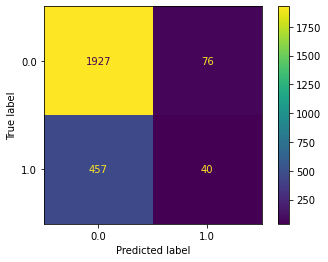

In [103]:
#confusion matrix with test data
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

#### Compare to KNN and Grid Searching

Let's compare how this estimator performs compared to the `KNeighborsClassifier`.  This time however, we will be trying many KNN models across different numbers of neighbors.  One way we could do this is with a loop; something like:

```python
for neighbor in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
```



Instead, we can use the `GridSearchCV` object from sklearn.  This will take an estimator and a dictionary with parameters to be searched over.  

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters we want to try
params = {'n_neighbors': range(1, 30, 2)}

In [ ]:
# estimator with parameters
knn = KNeighborsClassifier()

In [ ]:
# grid search object
grid = GridSearchCV(knn, param_grid=params)

In [ ]:
# fit it
X = default[['student_binary', 'income', 'balance']]
y = default['default']
grid.fit(X, y)

In [ ]:
# what was best?
grid.best_estimator_

In [ ]:
# score it 
grid.score(X, y)

#### Comparing Results

A good way to think about classifier performance is using a **confusion matrix**.  Below, we visualize this using the `ConfusionMatrixDisplay.from_estimator`. 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# a single confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['No', 'Yes'])

In [ ]:
# compare knn and logistic
fig, ax = plt.subplots(1, 2, figsize = (19, 5))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['no', 'yes'], ax = ax[0])
ax[0].set_title('Logistic')
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels=['no', 'yes'], ax = ax[1])
ax[1].set_title('KNN')

#### Practice

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer(as_frame=True).frame

In [ ]:
cancer.head(3)

In [ ]:
# use all features


In [ ]:
# train/test split -- random_state = 42


In [ ]:
# pipeline to scale then knn


In [ ]:
# pipeline to scale then logistic


In [ ]:
# fit knn


In [ ]:
# fit logreg


In [ ]:
# compare confusion matrices on test data
